Importing the Dependancies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import pickle

## Data Collection and Processing

In [7]:
# loading the dataset to a pandas dataframe
data=pd.read_csv("Rainfall.csv")

In [8]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [9]:
data.shape

(366, 12)

In [10]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [11]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [12]:

data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [13]:
print('data info')
data.info()

data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [14]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [15]:
# remove extra spacce in all column
data.columns=data.columns.str.strip()

In [16]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [18]:
data=data.drop(columns=["day"])

In [19]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [20]:
# checking the number of missing values
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [21]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [22]:
# handle the missing value
data['winddirection']=data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed']=data['windspeed'].fillna(data['windspeed'].median())


In [23]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [24]:
# converting the yes and no to 1 and 0 respectively
data['rainfall']=data['rainfall'].map({'yes':1,'no':0})

In [25]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


Exploratory data Analysis [EDA]

In [26]:
data.shape

(366, 11)

In [27]:
# setting plot style for all the plots
sns.set_style('whitegrid')

In [28]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [29]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

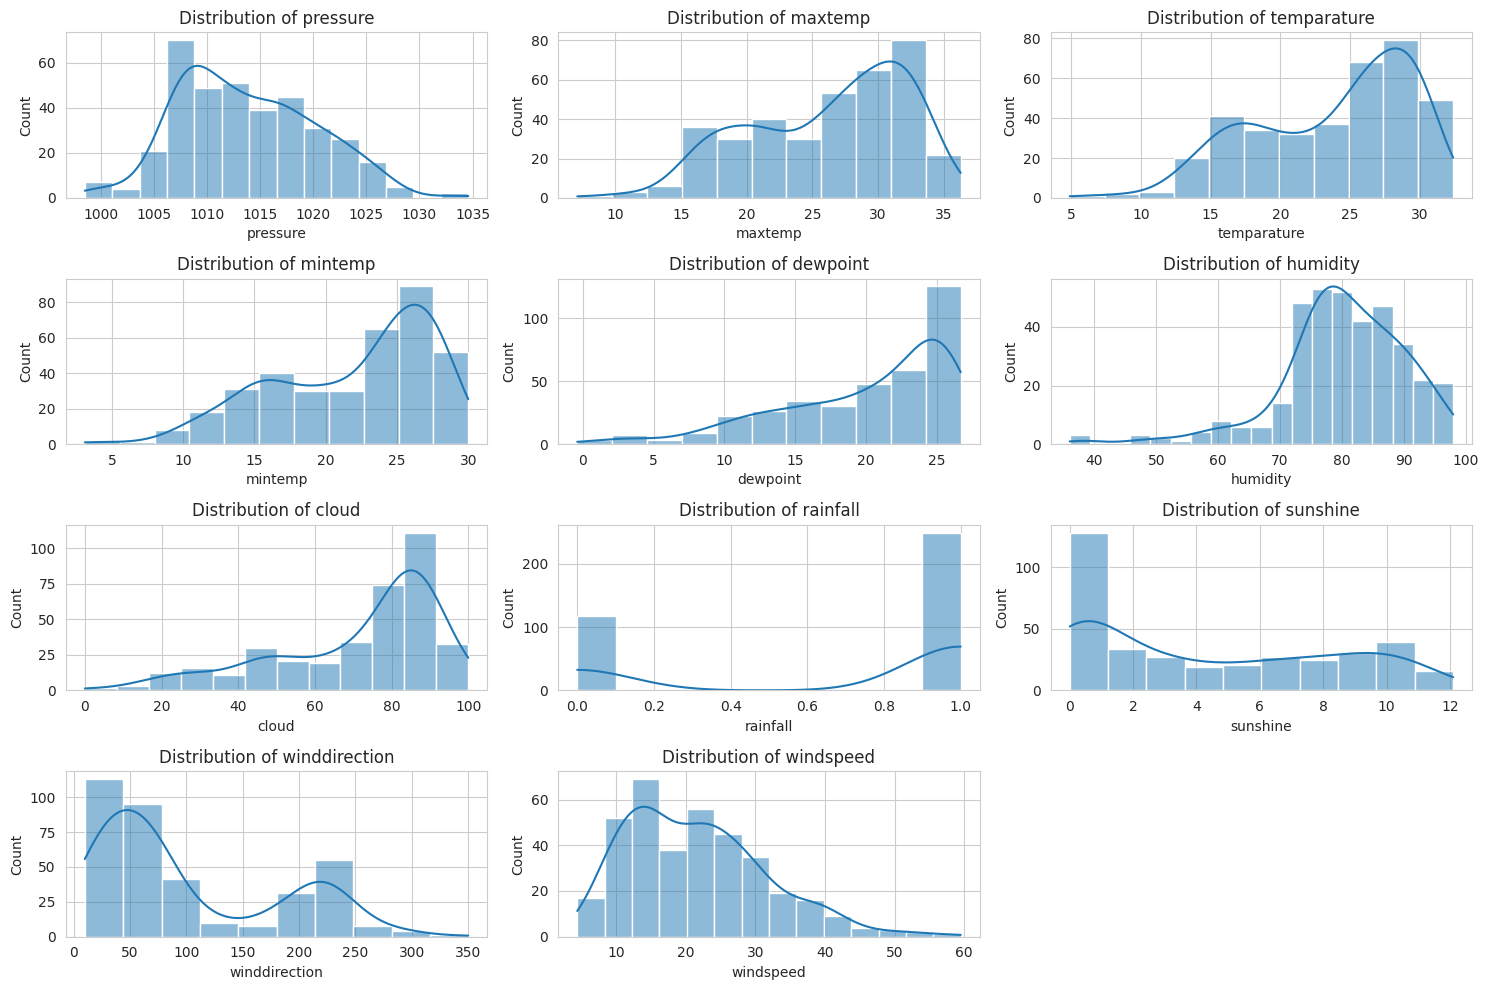

In [30]:
plt.figure(figsize=(15,10))

for i ,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],1):
    plt.subplot(4,3,i)
    sns.histplot(data[column],kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


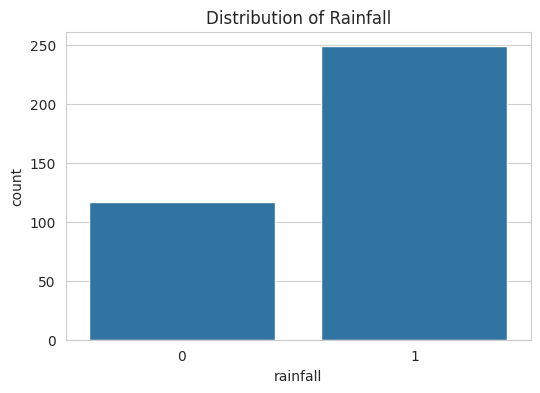

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall',data=data)
plt.title("Distribution of Rainfall")
plt.show()

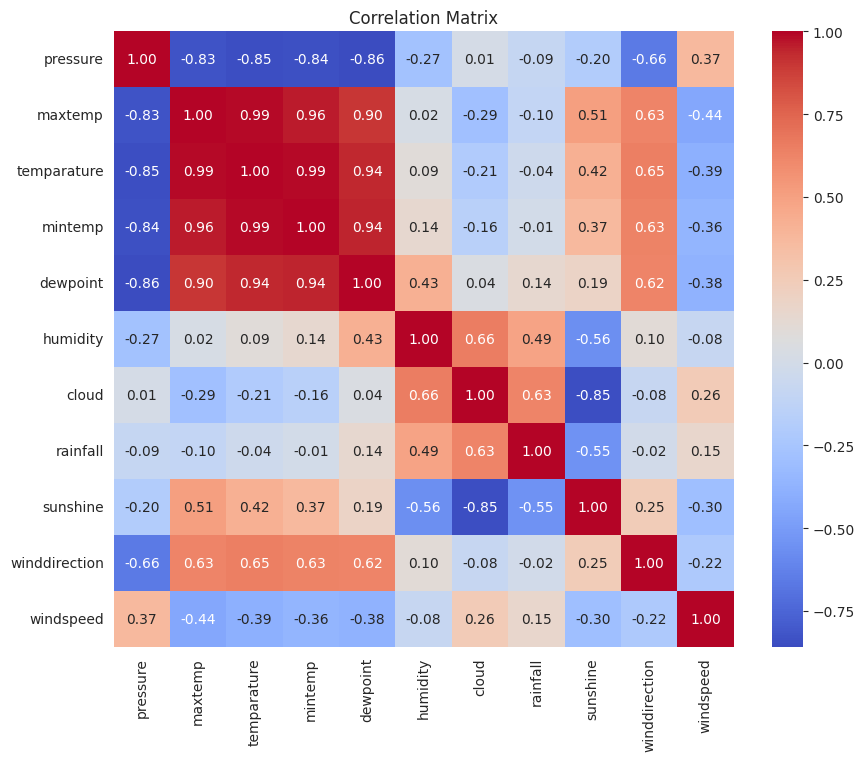

In [32]:
# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

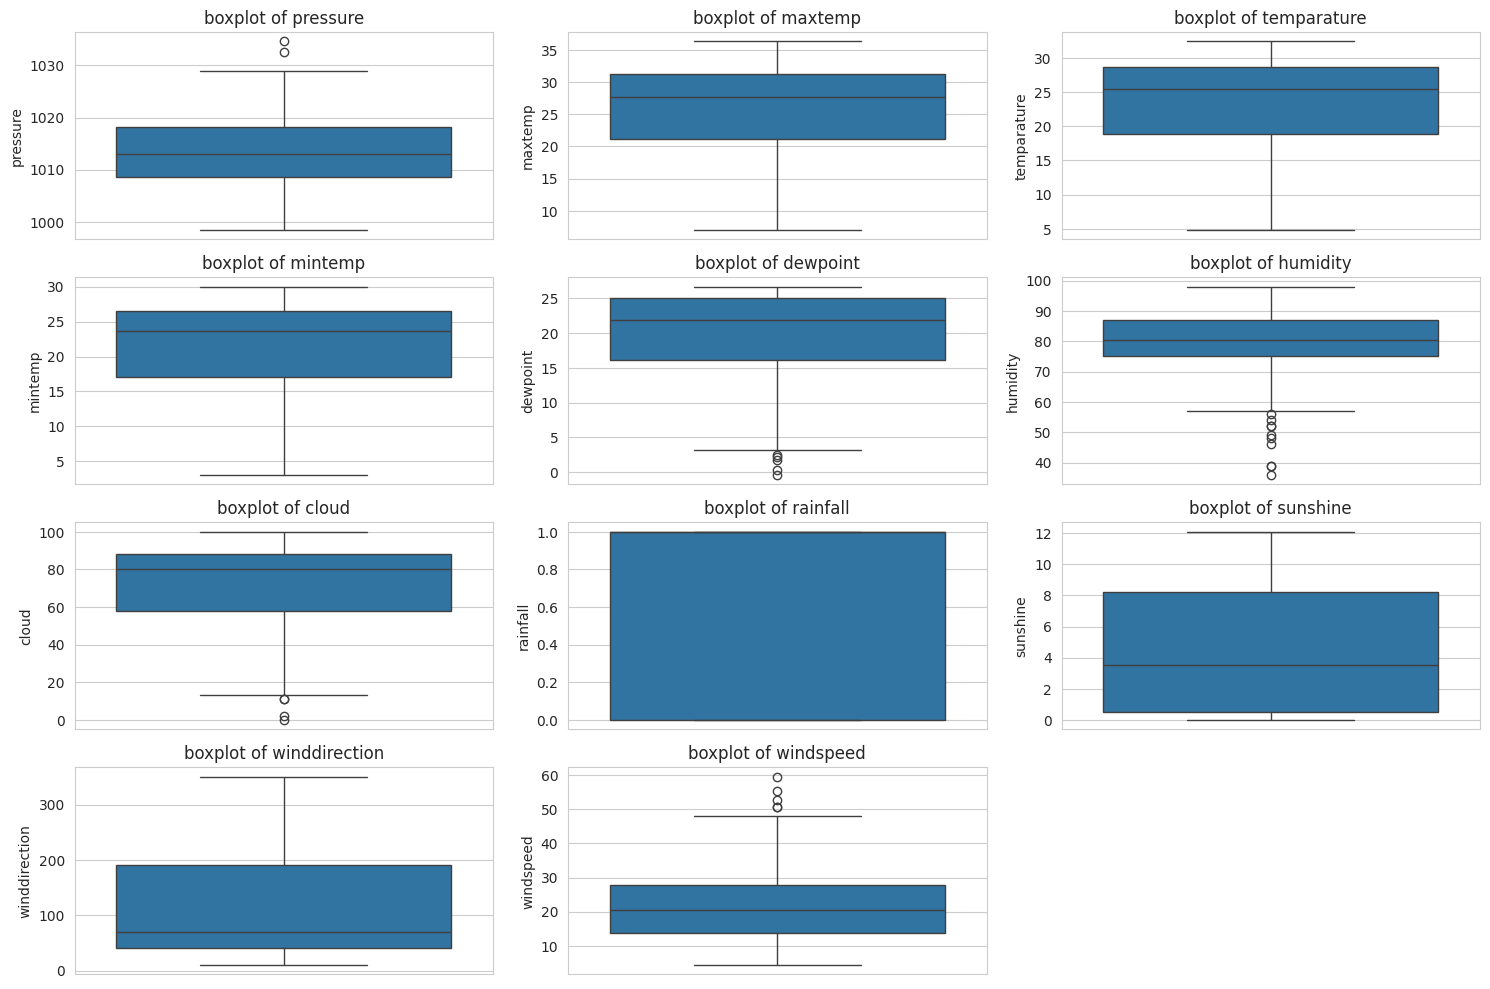

In [33]:
plt.figure(figsize=(15,10))

for i ,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],1):
    plt.subplot(4,3,i)
    sns.boxplot(data[column])
    plt.title(f"boxplot of {column}")
plt.tight_layout()
plt.show()


**Data** **Preprocessing**

In [34]:
# drop highly correlated columns
data=data.drop(columns=['maxtemp','temparature','mintemp'])

In [35]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [36]:
print(data['rainfall'].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [37]:
# seperate majority and minority class
df_majority=data[data['rainfall']==1]
df_minority=data[data['rainfall']==0]

In [38]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [39]:
# downsample majority class to match minority count
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [40]:
df_majority_downsampled.shape

(117, 8)

In [41]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [42]:
df_downsampled.shape

(234, 8)

In [43]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [44]:
# shuffle the final dataframe
df_downsampled=df_downsampled.sample(frac=1).reset_index(drop=True)


In [45]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1007.6,24.8,85,84,1,1.8,70.0,34.8
1,1012.5,19.9,95,88,1,0.6,50.0,15.1
2,1013.9,23.8,90,51,0,7.0,80.0,17.2
3,1015.2,20.7,76,19,0,9.1,90.0,14.1
4,1007.2,25.9,87,82,1,0.5,250.0,21.3


In [46]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [47]:
# Split feature and target as X and Y
x=df_downsampled.drop(columns=['rainfall'])
y=df_downsampled['rainfall']

In [48]:
print(x)


     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1007.6      24.8        85     84       1.8           70.0       34.8
1      1012.5      19.9        95     88       0.6           50.0       15.1
2      1013.9      23.8        90     51       7.0           80.0       17.2
3      1015.2      20.7        76     19       9.1           90.0       14.1
4      1007.2      25.9        87     82       0.5          250.0       21.3
..        ...       ...       ...    ...       ...            ...        ...
229    1032.6       3.7        46     25      10.1           20.0       28.7
230    1020.4      13.5        75     89       0.7           10.0       27.6
231    1012.5      19.3        70     43       9.7           60.0        8.9
232    1021.8      10.9        76     45       9.2           40.0        9.1
233    1025.4       8.7        62     71       2.1           30.0       29.0

[234 rows x 7 columns]


In [49]:
print(y)

0      1
1      1
2      0
3      0
4      1
      ..
229    0
230    1
231    0
232    0
233    0
Name: rainfall, Length: 234, dtype: int64


In [50]:
# Splitting the data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Model Training**

In [51]:
rf_model=RandomForestClassifier(random_state=42)

ParameterGrid_rf={
   "n_estimators":[50,100,200],
   "max_features":["sqrt","log2"],
   "max_depth":[None,10,20,30],
   "min_samples_split":[2,5,10],
   "min_samples_leaf":[1,2,4]
}

In [52]:
# Hypertuning using gridsearchCV
rf_grid=GridSearchCV(estimator=rf_model,param_grid=ParameterGrid_rf,cv=5,n_jobs=-1,verbose=2)
grid_search=rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [53]:
best_rf_model=grid_search.best_estimator_
print("best parameters for Random Forest:",grid_search.best_params_)

best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


MODEL EVALUATION

In [54]:
cv_scores=cross_val_score(best_rf_model,x_train,y_train,cv=5)
print("Cross_validation scores:",cv_scores)
print("Mean cross_validation score:",np.mean(cv_scores))

Cross_validation scores: [0.71052632 0.78947368 0.91891892 0.75675676 0.72972973]
Mean cross_validation score: 0.7810810810810811


In [55]:
# test ste performance
y_pred=best_rf_model.predict(x_test)
print("test set Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

test set Accuracy: 0.851063829787234
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.83      0.86      0.84        22

    accuracy                           0.85        47
   macro avg       0.85      0.85      0.85        47
weighted avg       0.85      0.85      0.85        47

Confusion Matrix:
 [[21  4]
 [ 3 19]]


**Prediction on Unknown data**

In [56]:
x_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [57]:
input_data=(1015.9,19.9,95,81,0.0,40.0,13.7)

input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

prediction=best_rf_model.predict(input_df)
print(prediction)

[1]


In [58]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [59]:
prediction=best_rf_model.predict(input_df)
print("prediction result:","Rainfall" if prediction[0]==1 else "No Rainfall")

prediction result: Rainfall


In [60]:
# save model and feature name to a pickle file
model_data={"model":best_rf_model,"features_names":x.columns.tolist()}

with open("rainfall_prediction_model.pkl","wb") as file:
    pickle.dump(model_data,file)


load the saved model and file and use it for prediction

In [61]:
import pickle
import pandas as pd


In [62]:
# load the train model and feature name from the pickle file
with open("rainfall_prediction_model.pkl","rb") as file:
    model_data=pickle.load(file)

In [63]:
model=model_data["model"]
features_names=model_data["features_names"]

In [64]:
input_data=(1015.9,19.9,95,81,0.0,40.0,13.7)

input_df=pd.DataFrame([input_data],columns=features_names)

In [65]:
prediction=best_rf_model.predict(input_df)
print("prediction result:","Rainfall" if prediction[0]==1 else "No Rainfall")

prediction result: Rainfall
